In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
import os
import plotly.express as px
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import operator as op
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv('/content/Groceries_dataset.csv')
data.head()
#loading the dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


There are three columns = Member_number , Date, Iterm Description

* Member_number = Unique number
* Date  = Date of Transaction
* Iterm Description = product brought on this date


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Member_number and Date columns are not in correct datatype so we will change it in down the line

In [5]:
data.columns = ['memberID', 'Date', 'itemName']
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,memberID,Date,itemName
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


we are renaming the columns so it will be handy for us in future

In [7]:
nan_values = data.isna().sum()
nan_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


memberID    0
Date        0
itemName    0
dtype: int64

Checking the missing values. As we can see there are no missing values

In [8]:
data.Date = pd.to_datetime(data.Date)
data.memberID = data['memberID'].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   memberID  38765 non-null  object        
 1   Date      38765 non-null  datetime64[ns]
 2   itemName  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-ed15b9ee5a66>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.Date = pd.to_datetime(data.Date)


now they are in correct datatype
* Date as Date taken from pandas
* MemberID as string


In [9]:
Sales_weekly = data.resample('w', on='Date').size()
fig = px.line(data, x=Sales_weekly.index, y=Sales_weekly,
              labels={'y': 'Number of Sales',
                     'x': 'Date'})
fig.update_layout(title_text='Number of Sales Weekly',
                  title_x=0.5, title_font=dict(size=18))
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from above graph highest sales was done on Aug

In [10]:
Unique_customer_weekly = data.resample('w', on='Date').memberID.nunique()
fig = px.line(Unique_customer_weekly, x=Unique_customer_weekly.index, y=Unique_customer_weekly,
              labels={'y': 'Number of Customers'})
fig.update_layout(title_text='Number of Customers Weekly',
                  title_x=0.5, title_font=dict(size=18))
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



On september 7th we can see 183 customers brough  and it was highest throught out the dataset


In [11]:
Sales_per_Customer = Sales_weekly / Unique_customer_weekly
fig = px.line(Sales_per_Customer, x=Sales_per_Customer.index, y=Sales_per_Customer,
              labels={'y': 'Sales per Customer Ratio'})
fig.update_layout(title_text='Sales per Customer Weekly',
                  title_x=0.5, title_font=dict(size=18))
fig.update_yaxes(rangemode="tozero")
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The average number of sales per customer remained relatively steady at 2.2 until the end of December 2014. However, there was a significant increase in this metric in early 2015, reaching a peak of 3.3 sales per customer in the first week of March. This rise in sales per customer can be attributed to a consistent level of weekly sales coupled with a decline in the number of customers during that period. The drop in customer numbers is evident in the "Number of Customers Weekly" graph following March 2015.

In [12]:
Frequency_of_items = data.groupby(pd.Grouper(key='itemName')).size().reset_index(name='count')
fig = px.treemap(Frequency_of_items, path=['itemName'], values='count')
fig.update_layout(title_text='Frequency of the Items Sold',
                  title_x=0.5, title_font=dict(size=18)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



milk, vegetables, buns are highest sold

In [13]:
user_item = data.groupby(pd.Grouper(key='memberID')).size().reset_index(name='count') \
    .sort_values(by='count', ascending=False)
fig = px.bar(user_item.head(25), x='memberID', y='count',
             labels={'y': 'Number of Sales',
                     'count': 'Number of Items Bought'},
             color='count')
fig.update_layout(title_text='Top 20 Customers regarding Number of Items Bought',
                  title_x=0.5, title_font=dict(size=18))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



 3180 customers are our the best customer as per the above graph



In [14]:
day = data.groupby(data['Date'].dt.strftime('%A'))['itemName'].count()
fig = px.bar(day, x=day.index, y=day, color=day,
             labels={'y': 'Number of Sales',
                     'Date': 'Week Days'})
fig.update_layout(title_text='Number of Sales per Discrete Week Days',
                  title_x=0.5, title_font=dict(size=18))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Thursdays. Sunday and Wednesday days lo .. maximun sales are happend

In [15]:
month = data.groupby(data['Date'].dt.strftime('%m'))['itemName'].count()
fig = px.bar(month, x=month.index, y=month, color=month,
             labels={'y': 'Number of Sales',
                     'Date': 'Months'})
fig.update_layout(title_text='Number of Sales per Discrete Months',
                  title_x=0.5, title_font=dict(size=18))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [16]:
month_day = data.groupby(data['Date'].dt.strftime('%d'))['itemName'].count()
fig = px.bar(month_day, x=month_day.index, y=month_day, color=month_day,
             labels={'y': 'Number of Sales',
                     'Date': 'Month Days'})
fig.update_layout(title_text='Number of Sales per Discrete Month Days',
                  title_x=0.5, title_font=dict(size=18))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**Market Basket Analysis**

* Stores use market basket analysis to figure out what people like to buy together.

* They look at a lot of receipts to see what products are often bought together. Then, they use this information to make decisions about how to stock their shelves and what discounts to offer. This can help them sell more products and make more money.

In [17]:
baskets = data.groupby(['memberID', 'itemName'])['itemName'].count().unstack().fillna(0).reset_index()
baskets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



itemName,memberID,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


The customers-items matrix is a table that shows what products each customer has bought.

Each row in the table represents a different customer, and each column represents a different product. The numbers in the table show how many times each customer has bought each product.

In [18]:
baskets['whole milk'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



2502.0

In [19]:
# Encoding the items that sold more than 1
def one_hot_encoder(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [20]:
baskets_final = baskets.iloc[:, 1:baskets.shape[1]].applymap(one_hot_encoder)
baskets_final.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



itemName,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Encoded the products which are sold more than 1 one product

In [21]:
# Finding the most frequent items sold together
frequent_itemsets = apriori(baskets_final, min_support=0.025, use_colnames=True, max_len=3).sort_values(by='support')
frequent_itemsets.head(25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
161,0.025141,"(shopping bags, butter)"
69,0.025141,(spread cheese)
405,0.025141,"(sliced cheese, whole milk)"
412,0.025141,"(specialty bar, whole milk)"
85,0.025141,"(beef, pip fruit)"
248,0.025141,"(domestic eggs, shopping bags)"
467,0.025141,"(citrus fruit, tropical fruit, whole milk)"
480,0.025141,"(frankfurter, whole milk, yogurt)"
119,0.025141,"(bottled water, chocolate)"
239,0.025141,"(root vegetables, dessert)"


As you can see from the results above, the most items that appeared together are butter and shopping bags, and spread cheese

In [22]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift', ascending=False)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.head(25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,support,confidence,lift
876,"(rolls/buns, yogurt)",(sausage),0.035659,0.320276,1.554717
877,(sausage),"(rolls/buns, yogurt)",0.035659,0.173101,1.554717
455,"(root vegetables, whole milk)",(shopping bags),0.029246,0.258503,1.536046
458,(shopping bags),"(root vegetables, whole milk)",0.029246,0.173780,1.536046
879,(yogurt),"(sausage, rolls/buns)",0.035659,0.126020,1.530298
874,"(sausage, rolls/buns)",(yogurt),0.035659,0.433022,1.530298
943,"(other vegetables, yogurt)",(sausage),0.037199,0.309168,1.500795
946,(sausage),"(other vegetables, yogurt)",0.037199,0.180573,1.500795
632,(shopping bags),"(soda, other vegetables)",0.031042,0.184451,1.485518
629,"(soda, other vegetables)",(shopping bags),0.031042,0.250000,1.485518


Created association rules for indicating astecedent and consequent items

sausage  = yogurt, rolls/buns

root vegetables, whole milk  =  shopping bags

rolls/buns, soda  =  sausage

butter, whole milk  =  yogurt,

and etc. have strong relationships.

# **RFM Analysis**

* calculate the Recency
    * To last purchase date of each customer
    * To last date for our dataset
* **Calculating Recency** by subtracting (last transaction date of dataset) and (last purchase date of each customer)


**Recency Distribution of the Customers**

    * Visit Frequency
    * Visit Frequency Distribution of the Customers
    
**Monetary**

**RFM Scores**
**Distribution of the RFM Segments**
**Relationship between Visit_Frequency and Recency**




In [23]:
# Lets Start with the calculate the Recency

# Finding last purchase date of each customer
Recency = data.groupby(by='memberID')['Date'].max().reset_index()
Recency.columns = ['memberID', 'LastDate']
Recency.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,memberID,LastDate
0,1000,2015-11-25
1,1001,2015-04-14
2,1002,2015-08-30
3,1003,2015-10-02
4,1004,2015-02-12


In [24]:
# Finding last date for our dataset
last_date_dataset = Recency['LastDate'].max()
last_date_dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Timestamp('2015-12-30 00:00:00')

In [25]:
# Calculating Recency by subtracting (last transaction date of dataset) and (last purchase date of each customer)
Recency['Recency'] = Recency['LastDate'].apply(lambda x: (last_date_dataset - x).days)
Recency.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,memberID,LastDate,Recency
0,1000,2015-11-25,35
1,1001,2015-04-14,260
2,1002,2015-08-30,122
3,1003,2015-10-02,89
4,1004,2015-02-12,321


In [26]:
fig = px.histogram(Recency, x='Recency', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Recency Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [27]:
# Frequency of the customer visits
Frequency = data.drop_duplicates(['Date', 'memberID']).groupby(by=['memberID'])['Date'].count().reset_index()
Frequency.columns = ['memberID', 'Visit_Frequency']
Frequency.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,memberID,Visit_Frequency
0,1000,5
1,1001,5
2,1002,4
3,1003,4
4,1004,8


In [28]:
fig = px.histogram(Frequency, x='Visit_Frequency', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Visit Frequency Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



According to Frequency Historgram of the Customers, we can see that most of the customers are distributed between their 2nd-5th visit to the Groceries Store

In [29]:
Monetary = data.groupby(by="memberID")['itemName'].count().reset_index()
Monetary.columns = ['memberID', 'Monetary']
Monetary.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,memberID,Monetary
0,1000,13
1,1001,12
2,1002,8
3,1003,8
4,1004,21


In [30]:
# I assumed each item has equal price and price is 10
Monetary['Monetary'] = Monetary['Monetary'] * 10
Monetary.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,memberID,Monetary
0,1000,130
1,1001,120
2,1002,80
3,1003,80
4,1004,210


In [31]:
# Monetary Distribution of the Customers


fig = px.histogram(Monetary, x='Monetary', opacity=0.85, marginal='box',
                   labels={'itemName': 'Monetary'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Monetary Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [32]:
# Combining all scores into one DataFrame
RFM = pd.concat([Recency['memberID'], Recency['Recency'], Frequency['Visit_Frequency'], Monetary['Monetary']], axis=1)
RFM.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,memberID,Recency,Visit_Frequency,Monetary
0,1000,35,5,130
1,1001,260,5,120
2,1002,122,4,80
3,1003,89,4,80
4,1004,321,8,210


In [33]:
# 5-5 score = the best customers
RFM['Recency_quartile'] = pd.qcut(RFM['Recency'], 5, [5, 4, 3, 2, 1])
RFM['Frequency_quartile'] = pd.qcut(RFM['Visit_Frequency'], 5, [1, 2, 3, 4, 5])

RFM['RF_Score'] = RFM['Recency_quartile'].astype(str) + RFM['Frequency_quartile'].astype(str)
RFM.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,memberID,Recency,Visit_Frequency,Monetary,Recency_quartile,Frequency_quartile,RF_Score
0,1000,35,5,130,5,4,54
1,1001,260,5,120,2,4,24
2,1002,122,4,80,3,3,33
3,1003,89,4,80,4,3,43
4,1004,321,8,210,2,5,25


In [34]:
# 5-5 score = the best customers
RFM['Recency_quartile'] = pd.qcut(RFM['Recency'], 5, [5, 4, 3, 2, 1])
RFM['Frequency_quartile'] = pd.qcut(RFM['Visit_Frequency'], 5, [1, 2, 3, 4, 5])

RFM['RF_Score'] = RFM['Recency_quartile'].astype(str) + RFM['Frequency_quartile'].astype(str)
RFM.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,memberID,Recency,Visit_Frequency,Monetary,Recency_quartile,Frequency_quartile,RF_Score
0,1000,35,5,130,5,4,54
1,1001,260,5,120,2,4,24
2,1002,122,4,80,3,3,33
3,1003,89,4,80,4,3,43
4,1004,321,8,210,2,5,25


In [35]:
segt_map = {  # Segmentation Map [Ref]
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

RFM['RF_Segment'] = RFM['RF_Score'].replace(segt_map, regex=True)
RFM.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,memberID,Recency,Visit_Frequency,Monetary,Recency_quartile,Frequency_quartile,RF_Score,RF_Segment
0,1000,35,5,130,5,4,54,champions
1,1001,260,5,120,2,4,24,at risk
2,1002,122,4,80,3,3,33,need attention
3,1003,89,4,80,4,3,43,potential loyalists
4,1004,321,8,210,2,5,25,can't loose


In [36]:
# Distribution of the RFM Segments

x = RFM.RF_Segment.value_counts()
fig = px.treemap(x, path=[x.index], values=x)
fig.update_layout(title_text='Distribution of the RFM Segments', title_x=0.5,
                  title_font=dict(size=20))
fig.update_traces(textinfo="label+value+percent root")
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



According to our RFM analysis, most of the customers are segmented into hibernating group which is they are not visiting our store often and it passed pretty much time after their last visit. You can find detailed information about these segments in the references part of this notebook

In [37]:
# Relationship between Visit_Frequency and Recency

fig = px.scatter(RFM, x="Visit_Frequency", y="Recency", color='RF_Segment',
                 labels={"math score": "Math Score",
                         "writing score": "Writing Score"})
fig.update_layout(title_text='Relationship between Visit_Frequency and Recency',
                  title_x=0.5, title_font=dict(size=20))
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



As you can see the graph above, when the visit frequency is low and the recency is high, customers are most likely to segmented into hibernating segment. In contrast, when they are visiting our store frequently, and their recency is low, they are most likely to segmented into champions segment which is the best segment for all of the customer segments.

# ML Models:

* Apriori and Frequent Pattern (Fp)
* Growth algorithms
* RARM
* ECLAT
* ASPMS



In [38]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [40]:
# Load the dataset
groceries = pd.read_csv("/content/Groceries_dataset.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [41]:
# Get all the transactions as a list of lists
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(groceries.groupby(['Member_number', 'Date']))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [42]:
# First 21st transactions in the transactional dataset
len(all_transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



14963

In [43]:
# Look at the 10 first transactions
all_transactions[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [44]:
# The following instructions transform the dataset into the required format
trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [45]:
trans_encoder_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):

    start_time = 0
    total_execution = 0

    if(not rule_type=="fpgrowth"):
        start_time = time.time()
        rule_items = apriori(transact_items_matrix,
                       min_support=min_support,
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Apriori!")

    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix,
                       min_support=min_support,
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth!")

    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))

    return rule_items, total_execution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [47]:
def compute_association_rule(rule_matrix, metric="lift", min_thresh=1):

    rules = association_rules(rule_matrix,
                              metric=metric,
                              min_threshold=min_thresh)

    return rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [48]:
# Plot Lift Vs Coverage(confidence)
def plot_metrics_relationship(rule_matrix, col1, col2):

    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1],
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [49]:
def compare_time_exec(algo1=list, alg2=list):


    execution_times = [algo1[1], algo2[1]]
    algo_names = (algo1[0], algo2[0])
    y=np.arange(len(algo_names))

    plt.bar(y,execution_times,color=['orange', 'blue'])
    plt.xticks(y,algo_names)
    plt.xlabel('Algorithms')
    plt.ylabel('Time')
    plt.title("Execution Time (seconds) Comparison")
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [50]:
val = {'name':12}
value = list(val.items())[0]
value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



('name', 12)

**Case n°1: Using Fp Growph Algorithm**

In [51]:
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(trans_encoder_matrix) # Run the algorithm
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Computed Fp Growth!
Fp Growth execution took: 0.26575279235839844 seconds


In [52]:
fpgrowth_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets,number_of_items
0,0.157923,(whole milk),1
1,0.085879,(yogurt),1
2,0.060349,(sausage),1
3,0.009490,(semi-finished bread),1
4,0.051728,(pastry),1


In [53]:
fpgrowth_matrix.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets,number_of_items
745,0.001403,"(chewing gum, yogurt)",2
746,0.001069,"(chewing gum, other vegetables)",2
747,0.001002,"(chewing gum, soda)",2
748,0.001069,"(pasta, whole milk)",2
749,0.001002,"(rolls/buns, seasonal products)",2


**Lift**

In [54]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [55]:
fp_growth_rule_lift.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(rolls/buns, whole milk)",(yogurt),0.013968,0.085879,0.001337,0.095694,1.114293,0.000137,1.010854,0.104023
1,"(rolls/buns, yogurt)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701,0.076751
2,"(whole milk, yogurt)",(rolls/buns),0.011161,0.110005,0.001337,0.119760,1.088685,0.000109,1.011083,0.082380
3,(rolls/buns),"(whole milk, yogurt)",0.110005,0.011161,0.001337,0.012151,1.088685,0.000109,1.001002,0.091530
4,(whole milk),"(rolls/buns, yogurt)",0.157923,0.007819,0.001337,0.008464,1.082428,0.000102,1.000650,0.090433


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



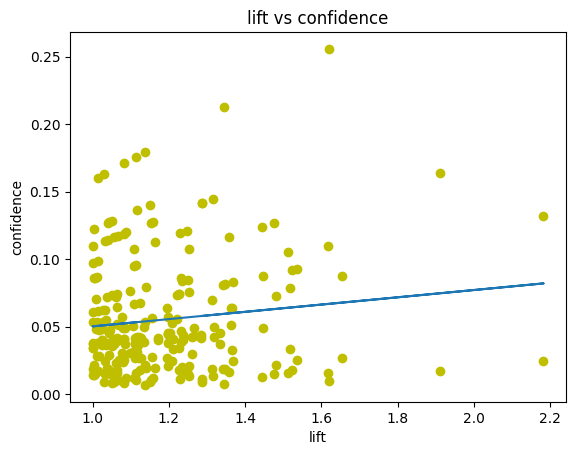

In [56]:
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')

Confidence

In [57]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.2)
fp_growth_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
1,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214


Case n°2: Using Apriori Algorithm

In [58]:
apriori_matrix, apriori_exec_time = perform_rule_calculation(trans_encoder_matrix, rule_type="apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Computed Apriori!
Apriori Execution took: 2.7752468585968018 seconds


In [59]:
apriori_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets,number_of_items
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1


In [60]:
apriori_matrix.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets,number_of_items
745,0.001136,"(sausage, rolls/buns, whole milk)",3
746,0.001002,"(soda, rolls/buns, whole milk)",3
747,0.001337,"(rolls/buns, whole milk, yogurt)",3
748,0.001069,"(soda, sausage, whole milk)",3
749,0.001470,"(sausage, whole milk, yogurt)",3


Lift

In [61]:
apriori_rule_lift = compute_association_rule(apriori_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [62]:
apriori_rule_lift.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426,0.058402
1,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326,0.061307
2,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012,0.174891
3,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196,0.175559
4,(beef),(citrus fruit),0.033950,0.053131,0.001804,0.053150,1.000349,6.297697e-07,1.000020,0.000361


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



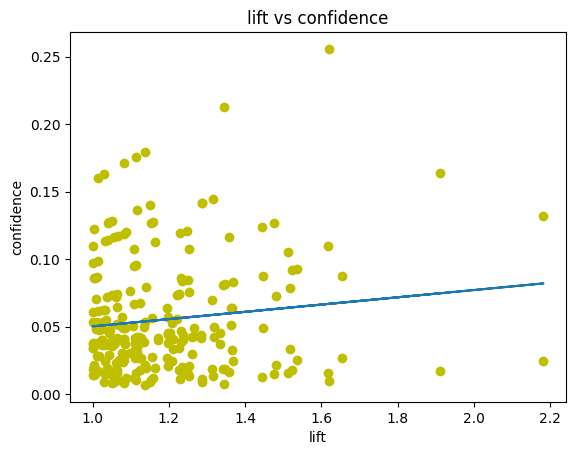

In [63]:
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')

Confidence

In [64]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.2)
apripri_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214
1,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

